# SEEK JOB MARKET DATA ANALYSIS
# 3030ICT_DATA ANALYTICS

## Group Member:
#### Thien Thao My Bui - s5273753 - thienthaomy.bui@griffithuni.edu.au
#### Pei Ying Ling - s5316321 - peiying.ling@griffithuni.edu.au

In [1]:
# Imports
import string
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Thao My\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Thao My\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load data
#df =pd.read_csv('data.csv')
df = pd.read_csv('C:/Users/Thao My/data.csv')

C:\Users\Thao My\AppData\Local\Temp\ipykernel_14616\1188110869.py:3: DtypeWarning: Columns (0,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:/Users/Thao My/data.csv')


# Part 1 – Data Preparation and Preprocessing. [15 points]

### 1. Describe the dataset. (8 points)

#### General information

In [3]:
print(f"The Dataset consists of: {df.shape[0]} rows and {df.shape[1]} columns")
df.head(10)

The Dataset consists of: 318477 rows and 13 columns


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07T00:00:00.000Z,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07T00:00:00.000Z,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
5,37404307,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07T00:00:00.000Z,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Customer Service - Call Centre,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN
6,37404355,Casual Café All-rounder in Semaphore,Jora Local,2018-10-07T00:00:00.000Z,Adelaide,NaN,Hospitality & Tourism,Waiting Staff,A cafe/restaurant in Semaphore is seeking a ca...,NaN,0,30,NaN
7,37404350,Casual Café All-rounder in Woolloongabba,Jora Local,2018-10-07T00:00:00.000Z,Brisbane,CBD & Inner Suburbs,Hospitality & Tourism,Waiting Staff,A cafe in Woolloongabba is seeking a casual Ca...,NaN,0,30,NaN
8,37404301,Telemarketer,Reventon Investments,2018-10-07T00:00:00.000Z,Melbourne,CBD & Inner Suburbs,Call Centre & Customer Service,Sales - Outbound,Market leading investment & financial services...,NaN,0,30,NaN
9,37404286,Casual Dish Hand in Brighton,Jora Local,2018-10-07T00:00:00.000Z,Melbourne,Bayside & South Eastern Suburbs,Hospitality & Tourism,Kitchen & Sandwich Hands,A restaurant in Brighton is seeking a casual D...,NaN,0,30,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 318477 non-null  object
 1   Title              318477 non-null  object
 2   Company            306473 non-null  object
 3   Date               318477 non-null  object
 4   Location           197229 non-null  object
 5   Area               122658 non-null  object
 6   Classification     197229 non-null  object
 7   SubClassification  197229 non-null  object
 8   Requirement        318470 non-null  object
 9   FullDescription    302302 non-null  object
 10  LowestSalary       318477 non-null  int64 
 11  HighestSalary      318477 non-null  int64 
 12  JobType            302379 non-null  object
dtypes: int64(2), object(11)
memory usage: 31.6+ MB


In [5]:
#Get the number of variations for each attribute
df.nunique()

Id                   318477
Title                168065
Company               40628
Date                    163
Location                 65
Area                     19
Classification           30
SubClassification       338
Requirement          234287
FullDescription      250901
LowestSalary             11
HighestSalary            11
JobType                   4
dtype: int64

There are 13 attributes that make up a job post, with different ranges and values. 

With a large number of variations in the job title, requirements and full description, it can be indicated that there does not seem to be a uniform standard of choosing job titles. In addition, with the ID uniquely identifying each job post, the total number of IDs is equal to the dataset's size. As this analysis aims to provide an overview of the Australian job market without the need for individual post identification, the ID column may not neccessary to be concerned.

Classification and Location are categorical variables, which have variation sizes of 30 and 65, seem to provide interesting information to analyse the spatial distribution and popular job sectors within Australia. SubClassification is also a categorical variable, which further divides
each Classification into more specific sections.

Area is a categorical variable that divides a location into smaller areas, and has 19 variations. At a first glance it seems like only the main cities such as Brisbane, Sydney and Melbourne have a value for Area, however, we will investigate the attribute further during analysis.

Lowest and Highest Salary are numerical variables with 11 different ranges, which will be used for analysis with respect to Location and Classification, in order to see where employees are paid better and what job sectors have the best potential to earn high salaries.

There are 4 job types, and the attribute can be used to determine whether there is a relationship between salaries and job type


#### Period

In [6]:
#fix the data type
df['Date'] = pd.to_datetime(df.Date)

#find the period and unique dates
dates = df.sort_values('Date')['Date'].dropna().unique()
start_date = dates[0]
end_date = dates[len(dates)-1]

print("The period covers by the data:")
print(f"Start date: {start_date}")
print(f"End date: {end_date}")
print(f"Number of different dates have job postings: {len(dates)}")

The period covers by the data:
Start date: 2018-10-01 00:00:00+00:00
End date: 2019-03-13 00:00:00+00:00
Number of different dates have job postings: 163


There are 163 different dates, which cover the date range of the datasets job posts from the 1st of October 2018 - 13th of October 2019

#### Location

In [7]:
location = df['Location'].value_counts().reset_index()
location.columns = ['Location', 'Total of Job Postings']
top_loc = location.iloc[0]

print(f"Number of locations: {len(location)}")
print(f"Location with most job postings: {top_loc['Location']} with {top_loc['Total of Job Postings']} job postings")
location

Number of locations: 65
Location with most job postings: Sydney with 60765 job postings


,Location,Total of Job Postings
0,Sydney,60765
1,Melbourne,46690
2,Brisbane,21466
3,Perth,13198
4,Adelaide,6653
...,...,...
60,Yorke Peninsula & Clare Valley,96
61,"Tumut, Snowy & Monaro",86
62,Somerset & Lockyer,65
63,Fleurieu Peninsula & Kangaroo Island,64


There are 65 locations in total, with Sydney having the most job postings of 60765 posts.

This dataset presents an overview of job market activity across various locations in Australia. While major cities like Sydney, Melbourne and Brisbane were recorded to have the highest number of job postings, small regions such as Yorke Peninsula & Clare Valley, Tumut, Snowy & Monaro, Somerset & Lockyer, Fleurieu Peninsula & Kangaroo Island, and Central & South East TAS have fewer job postings, suggesting comparatively lower levels of job market activity. 

#### Job Sectors

In [8]:
job_sector = df['Classification'].value_counts().reset_index()
job_sector.columns = ['Classification', 'Total of Job Postings']
print('Number of job sectors in the dataset:', len(job_sector), 'sectors')
job_sector

Number of job sectors in the dataset: 30 sectors


,Classification,Total of Job Postings
0,Information & Communication Technology,22796
1,Trades & Services,17976
2,Healthcare & Medical,17085
3,Hospitality & Tourism,15523
4,"Manufacturing, Transport & Logistics",12376
5,Administration & Office Support,10020
6,Accounting,9368
7,Education & Training,9280
8,Construction,8372
9,Sales,8119


#### ICT Sector 

In [9]:
ict_sector = df[df['Classification']=='Information & Communication Technology']
ict_sub_sector = ict_sector['SubClassification'].value_counts().reset_index()
ict_sub_sector.columns = ['SubClassification', 'Total of Job Postings']
print('Number of sub-sectors in ICT:', len(ict_sector), 'sub-sectors')
ict_sub_sector

Number of sub-sectors in ICT: 22796 sub-sectors


,SubClassification,Total of Job Postings
0,Developers/Programmers,4211
1,Business/Systems Analysts,2986
2,Programme & Project Management,2413
3,Architects,1548
4,Engineering - Software,1437
5,Help Desk & IT Support,1374
6,Networks & Systems Administration,1194
7,Consultants,1149
8,Other,997
9,Testing & Quality Assurance,831


#### Salary Range

In [10]:
lowest_salary = df['LowestSalary'].value_counts().to_frame('Total of Job Postings')
lowest_salary = lowest_salary.sort_index()

highest_salary = df['HighestSalary'].value_counts().to_frame('Total of Job Postings')
highest_salary = highest_salary.sort_index(ascending=False)

print("Salary Range:", '\n')
print(lowest_salary, '\n')
print(highest_salary)

Salary Range: 

              Total of Job Postings
LowestSalary                       
0                             62639
30                            23476
40                            34436
50                            27027
60                            28499
70                            28712
80                            24249
100                           27673
120                           24514
150                           25841
200                           11411 

               Total of Job Postings
HighestSalary                       
999                            11411
200                            25841
150                            24514
120                            27673
100                            24249
80                             28712
70                             28499
60                             27027
50                             34436
40                             23476
30                             62639


#### Job types & their salary range

In [11]:
#Job types & their salary range
df.groupby('JobType').agg({'LowestSalary':'min','HighestSalary':'max'})

,LowestSalary,HighestSalary
JobType,,
Casual/Vacation,0,999
Contract/Temp,0,999
Full Time,0,999
Part Time,0,999


### 2. Normalize and clean data. (7 points) 

#### Average Salary

In [12]:
#Calculate "Average Salary"
df['AverageSalary'] = (df['LowestSalary']+df['HighestSalary'])/2
classification_avg_salary = df.groupby('Classification').agg({'AverageSalary': 'mean'}).sort_values(by='AverageSalary', ascending=False)
classification_avg_salary

,AverageSalary
Classification,
CEO & General Management,255.434834
Information & Communication Technology,182.522328
Consulting & Strategy,157.566750
"Mining, Resources & Energy",128.636053
Construction,126.567547
Legal,122.188105
Engineering,121.180784
Healthcare & Medical,117.475329
Banking & Financial Services,111.021153


#### Data Format (date & id)

In [13]:
#Remove unnecessary characters in Id values and keep 8 number int 
df['Id'] = df['Id'].astype(str).str.extract(r'(\d{8})')
df['Id'].sort_values()

164335    31671087
155189    36018079
193509    36274131
189779    36274131
162347    36501930
            ...   
318408    38565408
318368    38565544
318353    38565720
318421    38565789
318399    38566133
Name: Id, Length: 318477, dtype: object

In [14]:
#Remove time in the "Date" column
df['Date'] = df['Date'].dt.date
df['Date']

0         2018-10-07
1         2018-10-07
2         2018-10-07
3         2018-10-07
4         2018-10-07
             ...    
318472    2019-03-13
318473    2019-03-13
318474    2019-03-12
318475    2019-03-08
318476    2019-03-13
Name: Date, Length: 318477, dtype: object

In [15]:
df['Id'] = pd.to_numeric(df['Id'])
df['Date'] = pd.to_datetime(df['Date'])

print(f"Id type: {df['Id'].dtypes}")
print(f"Date type: {df['Date'].dtypes}")

Id type: int64
Date type: datetime64[ns]


#### Duplicates

In [16]:
#Check for duplicates in dataset
duplicate_count = df[df.duplicated()].shape[0]
print(f"Duplicates found: {duplicate_count}")

no_dates_id = df.drop(['Date', 'Id'], axis=1)
duplicate_count_no_dates_id = no_dates_id[no_dates_id.duplicated()].shape[0]
difference = duplicate_count_no_dates_id - duplicate_count
print(f'Additional duplicates found without regard to timestamp and Id: {difference}')
print(f'Total number of duplicates found: {duplicate_count_no_dates_id}')

Duplicates found: 108
Additional duplicates found without regard to timestamp and Id: 15223
Total number of duplicates found: 15331


In [17]:
#Remove duplicates
df.drop_duplicates(inplace=True)

At first, there are 108 exact duplicates found within the dataset, these will be removed as identical job postings posted at the same time cannot safely be considered separate roles and is in turn considered dirty data.

An additional 15223 duplicate postings were found that were posted with different ID and at different date, but with all other attributes being identical. Further evaluation is needed as duplicate job postings could signify various scenarios, such as unfilled positions being reposted or additional capacity found within a company. These duplicates remain in the dataframe as they still contribute valuable information to the analysis.

#### Missing Data

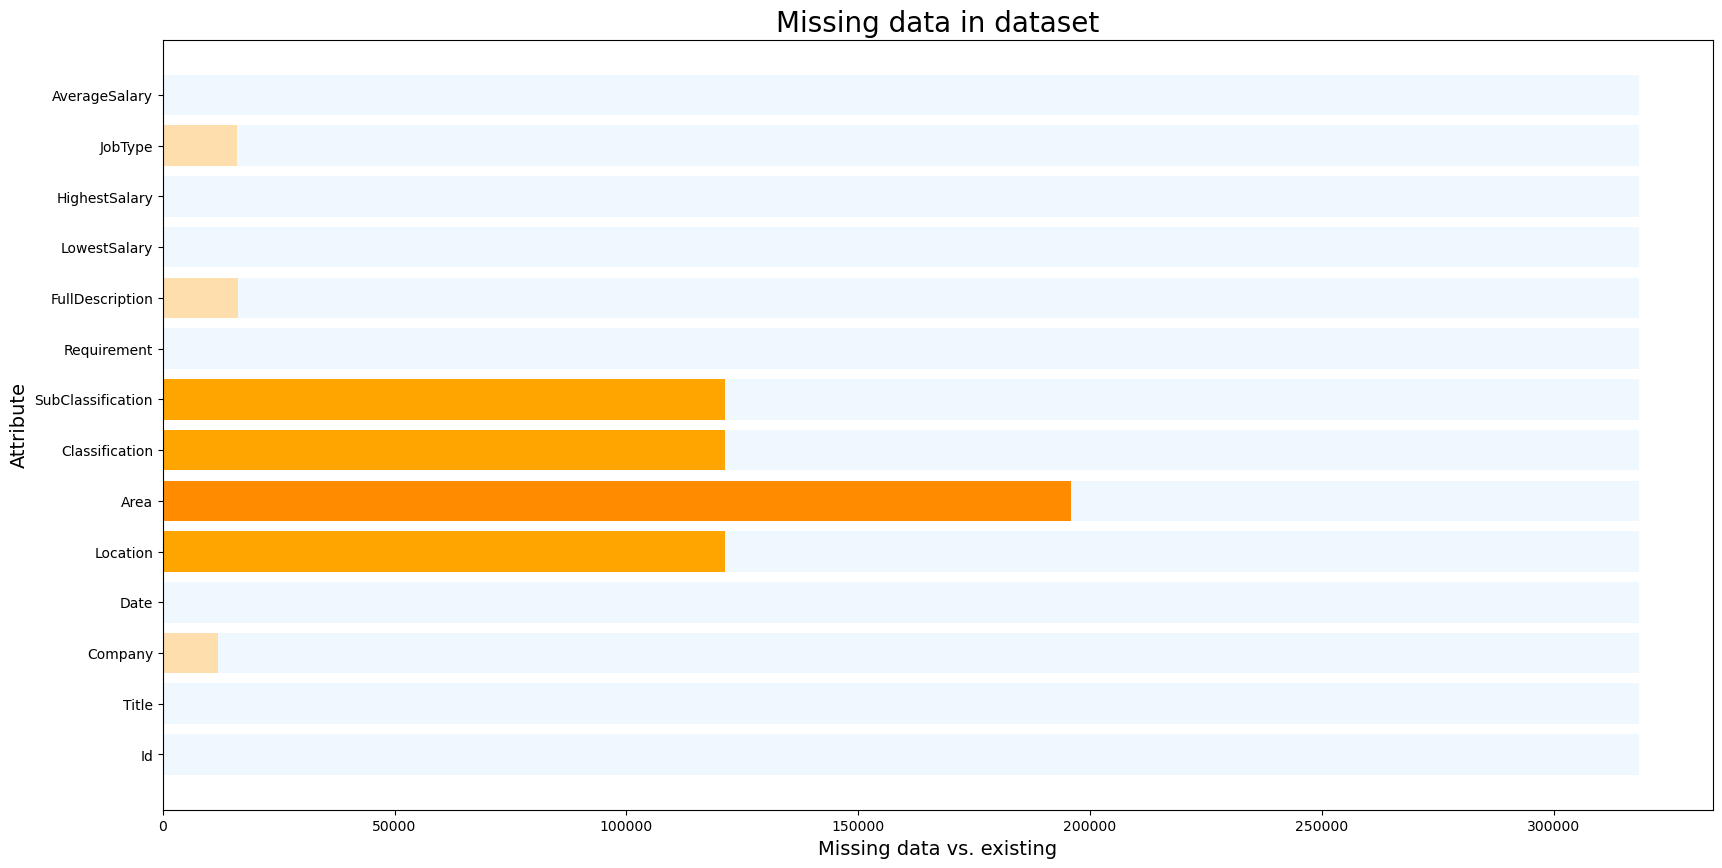

In [18]:
def colorize_bar(value, max_value):
    low, high = max_value * 0.2, max_value * 0.66
    if(value <= low):
        return 'navajowhite'
    elif(value >= high):
        return 'darkorange'
    else:
        return 'orange'

    
nulls = df.isnull().sum()
cols = [colorize_bar(n, nulls.max()) for n in nulls]

total_data = [df.shape[0]] * df.shape[1]

plt.figure(figsize=(20,10))
plt.barh(df.columns.values,total_data, color='aliceblue')
plt.barh(df.columns.values,nulls, color=cols)

plt.ylabel('Attribute', size=14)
plt.xlabel('Missing data vs. existing', size=14)
plt.title('Missing data in dataset', size=20)

plt.show();

In [19]:
tot = df.shape[0]

print('Attributes with missing data: ')
for i in range(len(nulls)):
    if(nulls[i] > 0):
        print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / tot) * 100))

Attributes with missing data: 
    Company: 3.77%
    Location: 38.08%
    Area: 61.50%
    Classification: 38.08%
    SubClassification: 38.08%
    Requirement: 0.00%
    FullDescription: 5.07%
    JobType: 5.04%


C:\Users\Thao My\AppData\Local\Temp\ipykernel_14616\1102213639.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if(nulls[i] > 0):
C:\Users\Thao My\AppData\Local\Temp\ipykernel_14616\1102213639.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print('    {0}: {1:.2f}%'.format(df.columns.values[i], (nulls[i] / tot) * 100))


In [20]:
df_area = df[(df['Area'].isna()==False) & (df['Location'].isna()==False)]
print(df_area['Location'].unique())

['Sydney' 'Brisbane' 'Melbourne' 'Perth']


From the analysis, it seems that only job posts for larger citites contain an Area

In [21]:
#Investigate missing data in classification. subclassification & location column
df_missing_data = df[(df['Classification'].isna()==True)&(df['SubClassification'].isna()==True)&(df['Location'].isna()==True)]
missing_data_dates = df_missing_data.sort_values('Date')['Date'].dropna().unique()
missing_data_start = missing_data_dates[0]
print(missing_data_start)
missing_data_end = missing_data_dates[len(missing_data_dates)-1]
print(missing_data_end)

2018-12-16 00:00:00
2019-03-13 00:00:00


In [22]:
#double check if there are any rows in the above date range have data for the 4 attributes at question
mask = (df['Date'] > missing_data_start) & (df['Date'] <= missing_data_end)

#accessing rows in period of the missing data 
temp = df.loc[mask]
print(len(temp[(temp['Classification'].isna()==False) & (temp['SubClassification'].isna()==False) & (temp['Location'].isna()==False) & (temp['Area'].isna()==False)]))

0


From the analyses, Area is considered to be the most notable attribute, with more than 61% of this aspect being missing from the postings. The main reason behind this is that only 4 out of 65 locations have specified an Area as part of a job post, which are Sydney, Melbourne, Brisbane and Perth.

Classification, SubClassification and Location of job postings is regularly void with a consistent 38.07% across the three. After further investigation, it can be confirmed that values for those attributes for any jobposts between 16-12-2018 and 13-03-2019 are missing. This means, that when analysing the dataset by Location, Classification & Subclassification, the data actually only covers a date range from 1-10-2018 to 16-12-2018.

Lastly, we found Company, Requirement, FullDescription and JobType attributes containing reasonable amounts of null data, suggesting the need for caution when interpreting these attributes in future analyses.

# Part 2 – Data Understanding. [5 points]

#### "AverageSalary" range

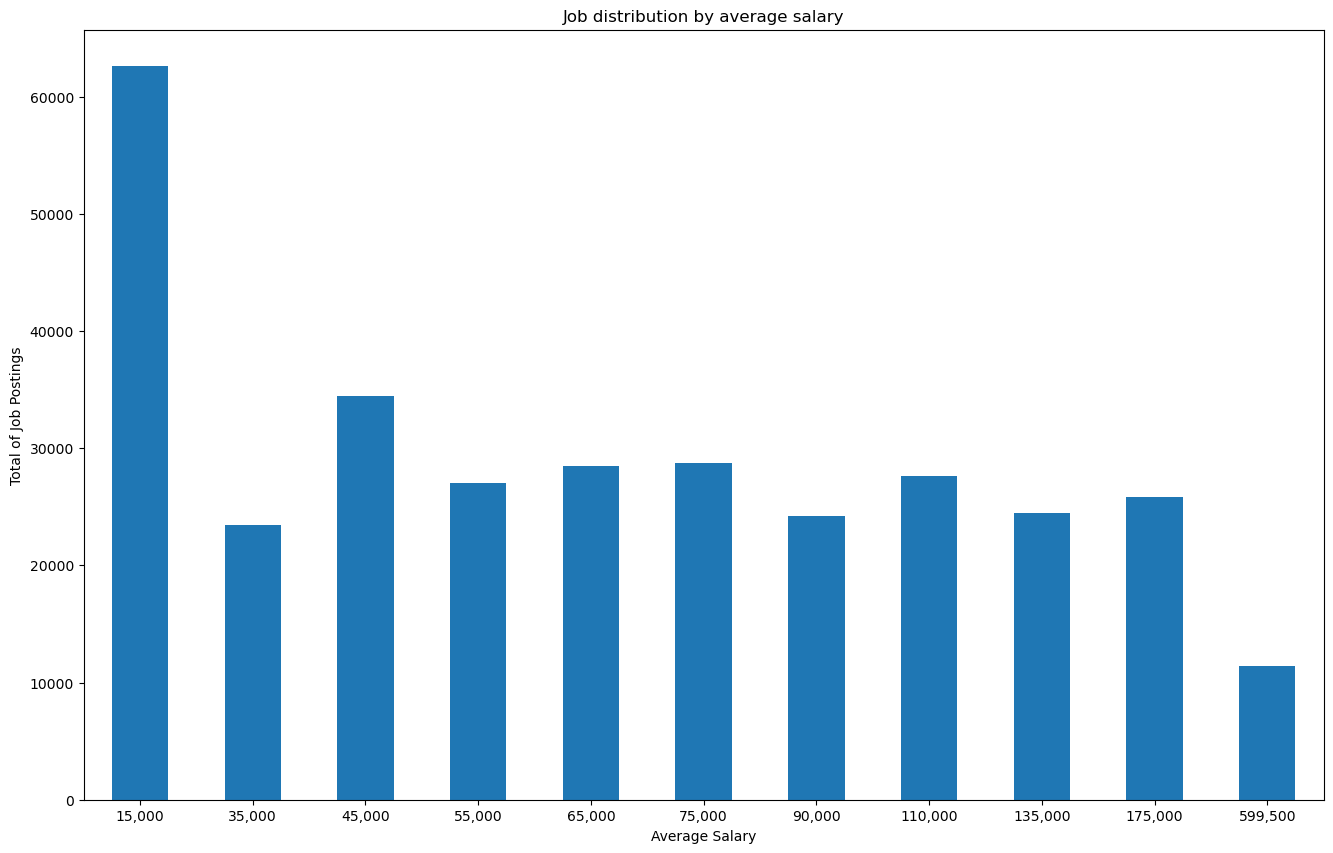

In [23]:
plt.figure(figsize=(16,10))
avg_salary = df['AverageSalary'].value_counts().sort_index()
avg_salary.index = (avg_salary.index*1000).astype(float).map('{:,.0f}'.format)

avg_salary.plot(kind='bar')
plt.xlabel('Average Salary')
plt.ylabel('Total of Job Postings')
plt.title('Job distribution by average salary')
plt.xticks(rotation=0)

plt.show()

There are 11 different Salary Ranges in terms of the Average Salary attribute. Among these, the lowest range, approximately 15.0K, encompasses the majority of job postings, with a share nearly double that of other ranges.

#### List of job types and their number of jobs

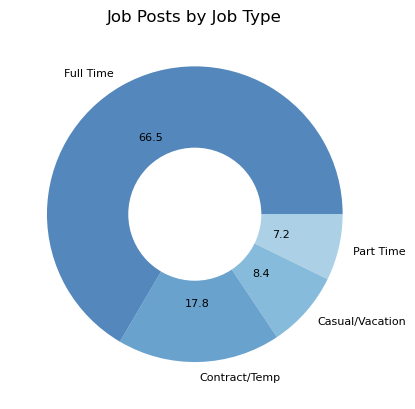

In [24]:
#Job types
job_type = df['JobType'].value_counts().reset_index()
job_type.columns = ['JobType', 'JobPosts']

#pie plot
plt.pie(job_type['JobPosts'], labels=job_type['JobType'], colors=sns.color_palette("Blues_r"),
        wedgeprops={'alpha':0.7}, autopct='%1.1f', textprops=dict(fontsize=8))
plt.title('Job Posts by Job Type')

# draw centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45, fc='white')
fig = plt.gcf()


# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

plt.show()

There are 4 different types of jobs being posted, which are Full Time, Contract/Temporary, Part Time and Casual. From the dataset, Over 66% of jobs constitute full-time positions, with contract and temporary positions accounting for almost 18%, while the remaining jobs are nearly evenly split between part-time and casual positions.

#### List of job sectors and their number of jobs

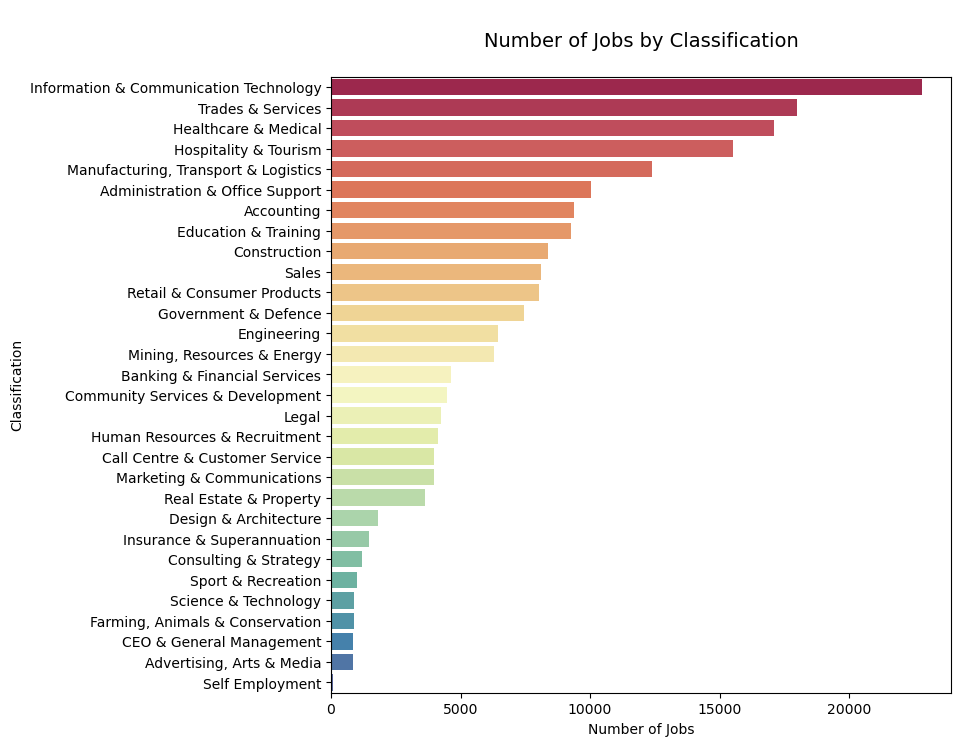

In [25]:
#Job sectors - data: job_sector
plt.figure(figsize=(8,8))
splot = sns.barplot(x=job_sector['Total of Job Postings'], y=job_sector['Classification'], palette='Spectral')
plt.title('\nNumber of Jobs by Classification\n',size=14)
plt.xlabel('Number of Jobs', fontsize=10)
plt.ylabel('Classification', fontsize=10)

#get the color of each classification to reuse later
color_by_classification = dict()
index = 0
for i, row in job_sector.iterrows():
    color_by_classification.update({row['Classification'] : splot.patches[index].get_facecolor()})
    index += 1

plt.show()

There are 30 different classifications in total.

The top 5 classifications with most job postings are:
- Information & Communication Technology
- Trades & Services
- Healthcare & Medical
- Hospitality & Tourism 
- Manufacturing, Transport & Logistics

Among the classifications with the lowest share of the market are:
- Self Employment
- Advertising Arts & Marketing
- CEO & General Manegement
- Farming, Animals & Conservation
- Science & Technology

#### Market share of Sydney

In [26]:
# Filter data for selected cities
sydney_data = df[df['Location'] == 'Sydney']

# Sum counts for cities not in the selected list and add as 'Other'
df_class = sydney_data['Classification'].value_counts().reset_index()
df_class.columns = ['Classification', 'Count']
total = df_class['Count'].sum()
df_class['Percent'] = df_class['Count'].apply(lambda x: x*100/total)

others = df_class[df_class['Percent']<1]
others_df = others.sum()
others_df['Classification'] = 'Others'

df_class = df_class.drop(others.index, axis=0)
df_class.loc[len(df_class)] = others_df
df_class

,Classification,Count,Percent
0,Information & Communication Technology,9543,15.714074
1,Hospitality & Tourism,4071,6.703552
2,Trades & Services,4023,6.624512
3,Accounting,4008,6.599812
4,Healthcare & Medical,3335,5.491610
5,"Manufacturing, Transport & Logistics",3307,5.445504
6,Administration & Office Support,3178,5.233085
7,Sales,3136,5.163925
8,Construction,2919,4.806600
9,Banking & Financial Services,2570,4.231916


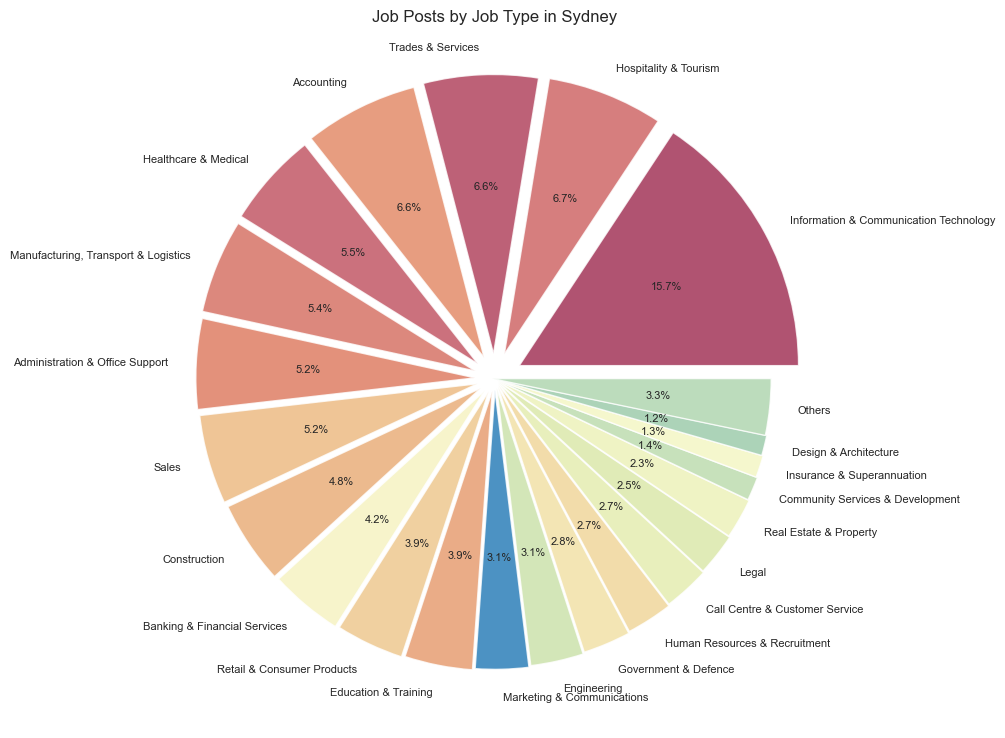

In [27]:
%matplotlib inline

# Pie char for job market share of cities
from matplotlib import cm

explode = [0.1-x*0.005 for x in range(len(df_class))]
clrs = df_class.sort_values(by="Count", ascending=False).reset_index()['Classification'].apply(lambda x: color_by_classification.get(x))

# Set the style
sns.set_style("white")

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(df_class['Count'], labels=df_class['Classification'], autopct='%1.1f%%', 
        startangle=0, colors =clrs, explode=explode, wedgeprops={'alpha':0.8},
       textprops=dict(fontsize=8))


plt.tight_layout()
plt.title('Job Posts by Job Type in Sydney')
plt.show()

##### Discussion:

The pie chart above can be used to get an insight into the share of each job sector in Sydney. 

With Information & Communication Technology (ICT) accounting for approximately 15.71% of job postings, it is considered as the dominant sector. 

Other prominent sectors include Hospitality & Tourism, Trades & Services, and Accounting, each representing significant portions of the market. Healthcare & Medical, Manufacturing, Transport & Logistics, and Administration & Office Support sectors also contribute notably to Sydney's job sector landscape. 

The variety of sectors reflects the vibrant and dynamic nature of Sydney's employment market, offering opportunities across a wide range of industries and professions.

#### Salary Distribution among the top 30 locations for number of job postings

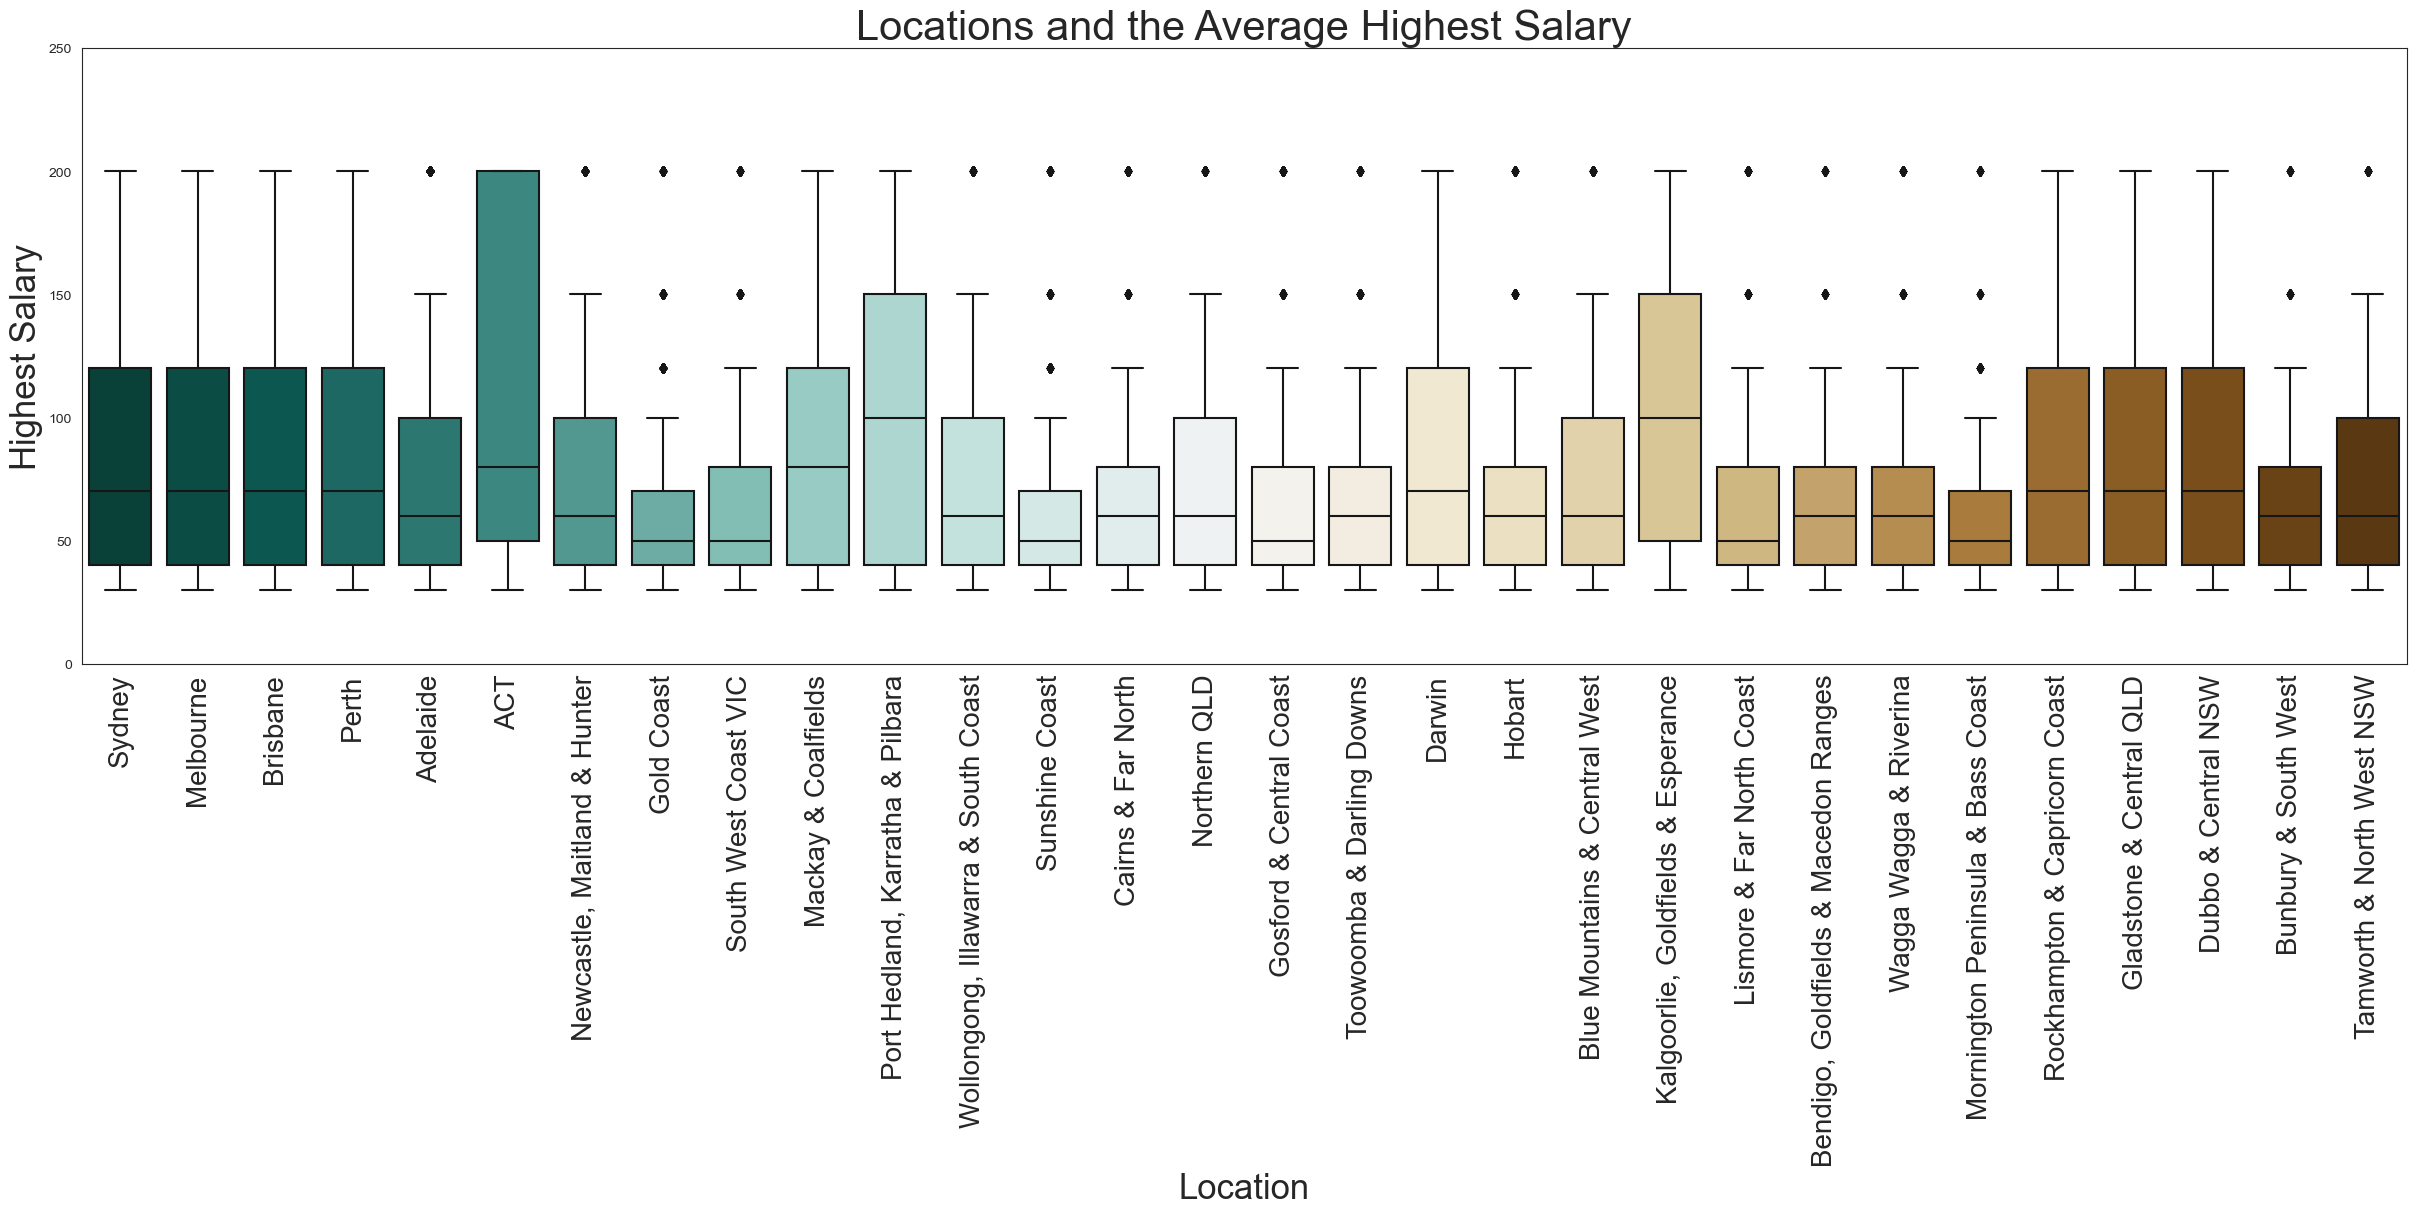

In [28]:
#get a list of locations ordered by Highest Salary (Average) descending
df_location = df[df['Location'].isna()==False]
df_top_30 = df_location.groupby(['Location']).count().reset_index().sort_values(by=['Title'],ascending=False)[:30]['Location'].tolist()
df_salary_locations_high = df[df['Location'].isin(df_top_30)]

plt.figure(figsize=(30,8))

box_plt_high = sns.boxplot(x='Location',y='HighestSalary',data=df_salary_locations_high, order=df_top_30,palette='BrBG_r')
box_plt_high.set_xticklabels(box_plt_high.get_xticklabels(),rotation=90,fontsize=20)
plt.title('Locations and the Average Highest Salary',size=30)
plt.ylabel('Highest Salary',fontsize=25)
plt.xlabel('Location',fontsize=25)

plt.ylim([0,250])
plt.show()

##### Discussion:
The Box and Whisker plot provides a comprehensive overview of salary distribution by illustrating the five-number summary of the dataset, including minimum, first quartile, median, third quartile, and maximum values. 

- Among the top 4 cities for job postings—Sydney, Melbourne, Brisbane, and Perth—the distribution of salaries appears relatively equal. 

- Adelaide stands out as the only city in the top 5 with slightly lower salaries. 

- The salary distribution in ACT surpasses other locations, with the third quartile reaching the maximum value. 

- Port Hedland, Karratha & Pilbara, and Kalgoorlie, Goldfields, and Esperance exhibit higher salaries, potentially influenced by their predominant sector, Mining, Resources & Energy, as indicated by the pie chart.

- Gold Coast, Sunshine Coast, and Cairns are among the locations with lower salaries.

# Part 3 – Data Analysis and Visualisation. [6 points]

### 1. Analyse by comparison. (2 points) 

In [29]:
# chosen cities/locations: Sydney and Brisbane
df_sydney = df[df['Location'] == 'Sydney']
df_brisbane = df[df['Location'] == 'Brisbane']

#### Total Jobs

In [30]:
# total jobs in each city
print("Total job in Sydney = ",len(df_sydney))
print("Total job in Brisbane = ",len(df_brisbane))

Total job in Sydney =  60729
Total job in Brisbane =  21455


In [31]:
df_sydney["JobType"].value_counts()

JobType
Full Time          40586
Contract/Temp      10989
Casual/Vacation     3017
Part Time           2849
Name: count, dtype: int64

In [32]:
df_brisbane["JobType"].value_counts()

JobType
Full Time          12997
Contract/Temp       4115
Casual/Vacation     1886
Part Time           1216
Name: count, dtype: int64

##### Discussion:

Based on above result, we can see that Sydney has more job than Brisbane. In both Sydney and Brisbane, the most common job type is "Full Time", followed by "Contract/Temp", "Casual/Vacation", and finally "Part Time". Despite Sydney having a significantly higher total number of job listings compared to Brisbane, the relative distribution of job types appears similar in both cities

#### Top 5 Job Sectors

In [33]:
Top5_JobSector_sydney = df_sydney['Classification'].value_counts().head(5).reset_index()
Top5_JobSector_sydney

,Classification,count
0,Information & Communication Technology,9543
1,Hospitality & Tourism,4071
2,Trades & Services,4023
3,Accounting,4008
4,Healthcare & Medical,3335


In [34]:
Top5_JobSector_brisbane = df_brisbane['Classification'].value_counts().reset_index().head(5)
Top5_JobSector_brisbane

,Classification,count
0,Information & Communication Technology,2766
1,Trades & Services,1992
2,Healthcare & Medical,1823
3,"Manufacturing, Transport & Logistics",1667
4,Hospitality & Tourism,1334


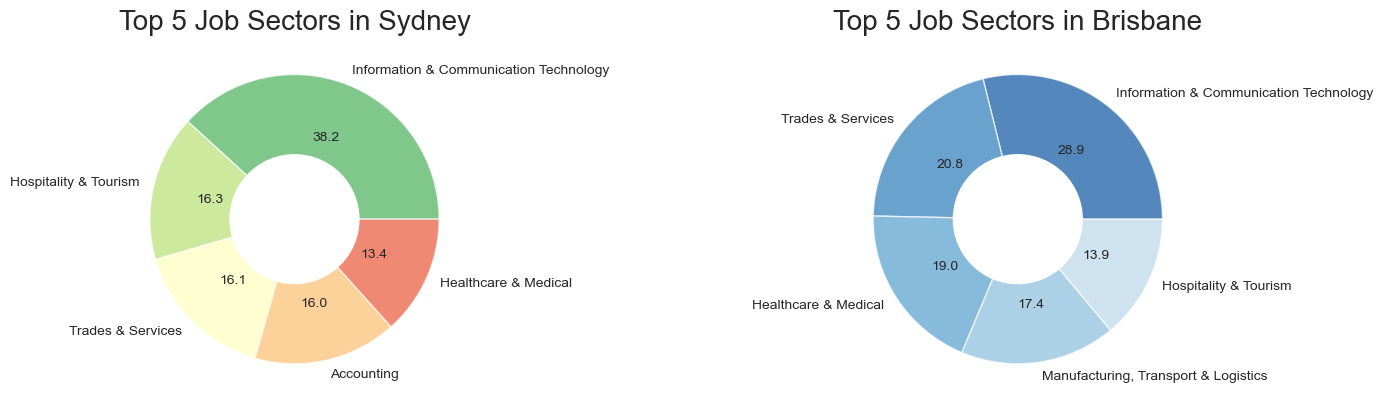

In [35]:
#create layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,14))
plt.subplots_adjust(wspace=1)  # Adjust the horizontal spacing

#job sectors plot
sydney = Top5_JobSector_sydney
brisbane = Top5_JobSector_brisbane


p, texts, autotexts = ax1.pie(sydney['count'], colors=sns.color_palette("RdYlGn_r", len(sydney)),labels=sydney['Classification'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax1.title.set_text('Top 5 Job Sectors in Sydney')
ax1.title.set_size(20)

# add centre circle to make it a donut
centre_circle = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax1.add_patch(centre_circle)

    
#jobtype plot    
p2, texts2, autotexts2 = ax2.pie(brisbane['count'], colors=sns.color_palette("Blues_r"),labels=brisbane['Classification'],wedgeprops={'alpha':0.7},autopct='%1.1f')
ax2.title.set_text('Top 5 Job Sectors in Brisbane')
ax2.title.set_size(20)

# add centre circle to make it a donut
centre_circle2 = plt.Circle((0,0),0.45,color='black', fc='white',linewidth=0)
ax2.add_patch(centre_circle2)

plt.show()

#### Salary range

In [36]:
sydney_salary = df_sydney['AverageSalary'].value_counts().reset_index().sort_values(by="count", ascending=False)
sydney_total = sydney_salary['count'].sum()
sydney_salary['Percent'] = sydney_salary['count'].apply(lambda x: x*100/sydney_total)
sydney_salary

,AverageSalary,count,Percent
0,15.0,11740,19.331785
1,175.0,6270,10.324557
2,135.0,5703,9.390901
3,110.0,5578,9.185068
4,45.0,5369,8.840916
5,65.0,5286,8.704243
6,75.0,5029,8.281052
7,55.0,4859,8.001120
8,35.0,3967,6.532299
9,90.0,3738,6.155214


In [37]:
brisbane_salary = df_brisbane['AverageSalary'].value_counts().reset_index().sort_values(by="count", ascending=False)
brisbane_total = brisbane_salary['count'].sum()
brisbane_salary['Percent'] = brisbane_salary['count'].apply(lambda x: x*100/brisbane_total)
brisbane_salary

,AverageSalary,count,Percent
0,15.0,4077,19.002564
1,45.0,2734,12.742950
2,65.0,2032,9.470986
3,110.0,1934,9.014216
4,55.0,1933,9.009555
5,75.0,1799,8.384992
6,175.0,1612,7.513400
7,35.0,1565,7.294337
8,135.0,1462,6.814262
9,90.0,1327,6.185038


In [38]:
# Calculate the weighted average salary for Sydney
sydney_weighted_avg_salary = (sydney_salary['AverageSalary'] * sydney_salary['Percent'] / 100).sum()

# Calculate the weighted average salary for Brisbane
brisbane_weighted_avg_salary = (brisbane_salary['AverageSalary'] * brisbane_salary['Percent'] / 100).sum()

print(f"Sydney weighted average salary: {sydney_weighted_avg_salary}")
print(f"Brisbane weighted average salary: {brisbane_weighted_avg_salary}")

Sydney weighted average salary: 103.31340875034992
Brisbane weighted average salary: 93.7511069680727


##### Discussion:
Looking at the 2 dataframes, it can be seen that the 2 cities have similar distribution of average salaries, with the most common category being 15.0$ 

• Looking at the higher-paying salary categories, the percentage of jobs in 175.0$, 135.0$ and 110.0$ is notably higher in Sydney compared to Brisbane. 

• On the other hand, Brisbane has a slightly higher proportion of jobs in terms of lowest-paying category than Sydney

Overall, Sydney is more well-paid than Brisbane, with a weighted average salary of 103$

#### Top 5 companies

In [39]:
top_5 = df_sydney['Company'].value_counts().head(5)
print("Top 5 companies in Sydney:")
for company in top_5.index:
    sector = df_sydney[df_sydney['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

Top 5 companies in Sydney:
Company: Jora Local, Sector: Hospitality & Tourism
Company: Robert Walters, Sector: Information & Communication Technology
Company: Design & Build, Sector: Construction
Company: Paxus, Sector: Information & Communication Technology
Company: Bluefin Resources Pty Limited, Sector: Information & Communication Technology


In [40]:
top_5 = df_brisbane['Company'].value_counts().head(5)
print("Top 5 companies in Brisbane:")
for company in top_5.index:
    sector = df_brisbane[df_brisbane['Company'] == company]['Classification'].iloc[0]
    print(f"Company: {company}, Sector: {sector}")

Top 5 companies in Brisbane:
Company: Jora Local, Sector: Hospitality & Tourism
Company: Hudson, Sector: Information & Communication Technology
Company: u&u. Recruitment Partners, Sector: Accounting
Company: The University of Queensland, Sector: Education & Training
Company: Programmed Skilled Workforce, Sector: Manufacturing, Transport & Logistics


#### Conclusion:

Based on the analysed data, Sydney is better for employees in terms of higher salary and job opportunities, especially for ICT sector with 38.2% in the number of jobs in top 5 job sectors. 

However, considering that Brisbane has a similar distribution of job types and average salaries, plus a balance job offers across all sectors aside ICT sector, it is a promising city as well for different industries.

### 2. Analyse by time. (2 points) 

#### Number of job posts by month

In [41]:
from collections import Counter

# Extract Month from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Month'].value_counts()

Month
10    113782
12     71521
1      69676
11     40985
2      22003
3        402
Name: count, dtype: int64

C:\Users\Thao My\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


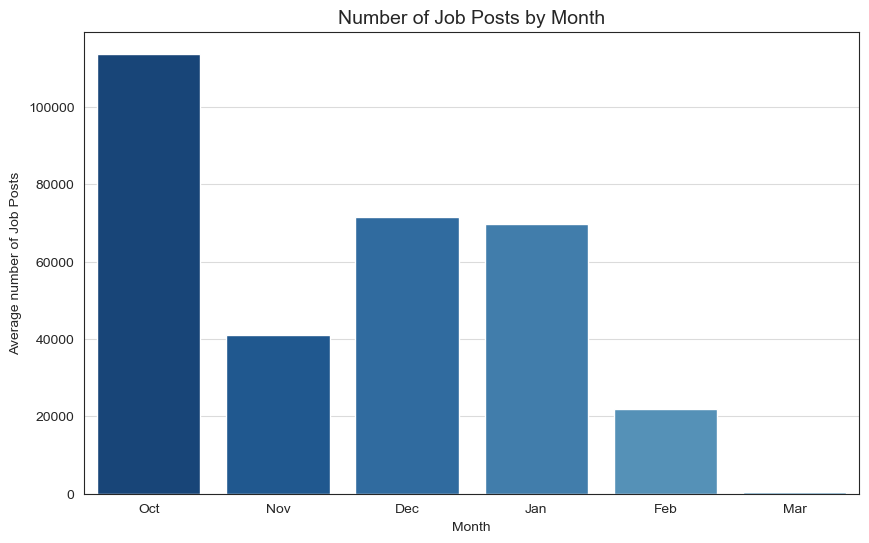

In [42]:
# Number of job posts by Month
months = [10, 11, 12, 1, 2, 3]
month_counter = Counter(df['Month'])
month_counts = [month_counter[m] for m in months]

month_labels = ['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar']

plt.figure(figsize=(10, 6))
sns.barplot(x=month_labels, y=month_counts, palette= sns.color_palette("Blues_r", 12))
plt.title('Number of Job Posts by Month', size=14)
plt.xlabel('Month')
plt.ylabel('Average number of Job Posts')
plt.grid(axis='y', linestyle='-', alpha=0.7)

#### Number of Job Posts by Day of Week

In [43]:
# Extract Week from the 'Date' column
df['Week'] = df['Date'].dt.weekday
df['Week'].value_counts()

Week
2    66500
4    61813
3    59173
1    57885
0    51948
6    12561
5     8489
Name: count, dtype: int64

C:\Users\Thao My\anaconda3\lib\site-packages\seaborn\_core.py:1485: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


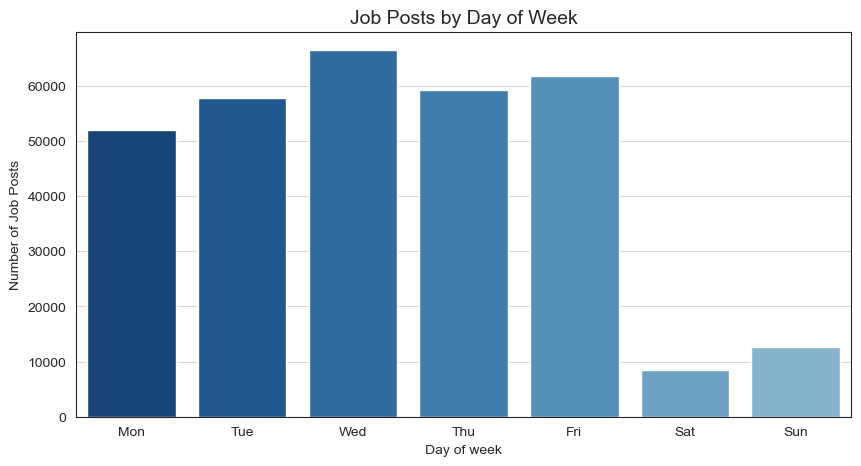

In [44]:
weekdays = [0, 1, 2, 3, 4, 5, 6]
weekday_counter = Counter(df['Week'])
weekday_counts = [weekday_counter[w] for w in weekdays]

weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

plt.figure(figsize=(10, 5))
sns.barplot(x=weekday_labels, y=weekday_counts, palette= sns.color_palette("Blues_r", 12))
plt.title('Job Posts by Day of Week', size=14)
plt.xlabel('Day of week')
plt.ylabel('Number of Job Posts')
plt.grid(axis='y', linestyle='-', alpha=0.7)

#### Average Job Posts by Day of Month

In [46]:
# Extract days from the 'Date' column
df['Day'] = df['Date'].dt.day

# Getting occurences of each day & month
unique_day_counts = df.groupby('Month')['Day'].value_counts().reset_index()
unique_day_counts = unique_day_counts['Day'].value_counts().sort_index()

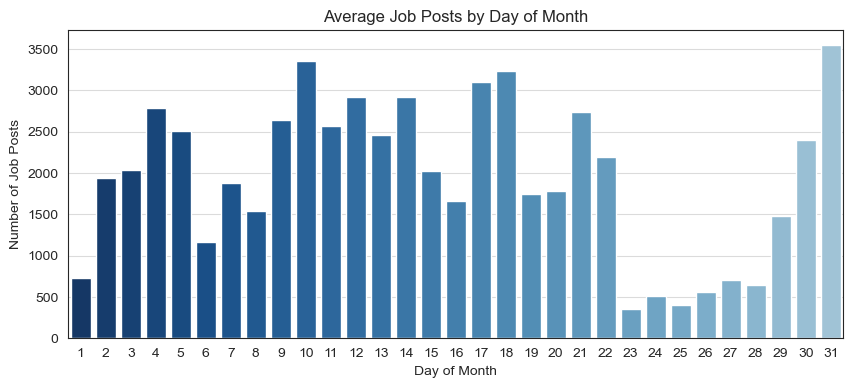

In [47]:
days_of_month = df['Day'].value_counts().sort_index()

day_of_month_counts = days_of_month.values/unique_day_counts
day_of_month_labels = days_of_month.index

plt.figure(figsize=(10, 4))
sns.barplot(x=day_of_month_labels, y=day_of_month_counts, palette= sns.color_palette("Blues_r", 50))
plt.title('Average Job Posts by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Number of Job Posts') 
plt.xticks(rotation=0) 
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

#### Trending of job postings for the big cities

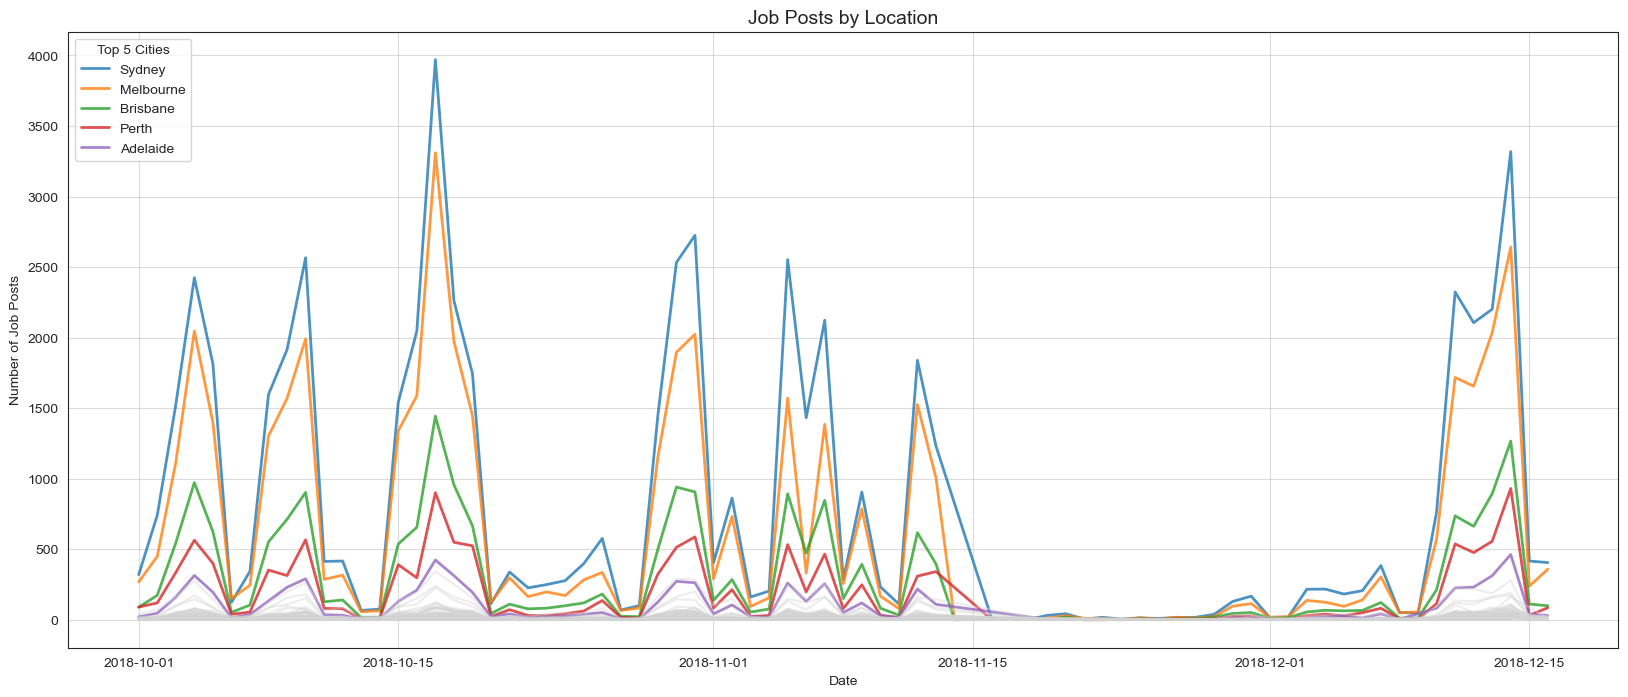

In [48]:
df_location = df[df['Location'].isna()==False]
plt.figure(figsize=(20,8))

# Get job counts per location
df_location_cnts = df_location.groupby('Location').count().reset_index()
df_location_top = df_location_cnts.sort_values(by=['Title'],ascending=False)['Location'].tolist()

# Plot top 5 in different colors
for location in df_location_top[:5]:
    df_current = df[df['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.8, lw=2)

# Plot the rest in light grey
for location in df_location_top[5:]:
    df_current = df_location[df_location['Location'] == location].groupby(['Date']).count().reset_index().sort_values(by=['Date'])
    df_current.set_index('Date',inplace=True)
    
    df_timeseries = df_current['Title'].rename('Count')

    plt.plot(df_timeseries,alpha=0.4,c='lightgrey')
    
plt.legend(df_location_top[:5], title='Top 5 Cities', frameon=True)
plt.title('Job Posts by Location',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.grid(linestyle='-', alpha=0.7)
plt.show()

### Conclusion:
- For the line chart: seasonal trends seem apparent, with heightened activity observed around mid-October and mid-December. The dataset spans from October 1st, 2018 to December 15th, 2018. Job postings exhibit irregular fluctuations without a recognized pattern. The highest peaks are in mid-October and mid-December. There's a noticeable decrease in job postings from mid-November to early December. These periods might correspond to seasonal hiring cycles or other external factors influencing job postings.

- For weekly patterns: Wednesdays see a higher frequency of job postings compared to other days, indicating a strategic preference for mid-week postings, possibly to maximize visibility and engagement among potential candidates. This weekly pattern suggests an understanding of optimal timing for reaching job seekers. Weekdays attract more job postings compared to weekends.

- For monthly patterns: October stands out as the month with the highest volume of job postings. There are noticeable fluctuations in job postings, with lulls observed between the 23rd and 28th. 

- For daily patterns: job postings drop significantly between the 23rd and 28th of each month. This observation underscores the importance of understanding intra-month variations and strategically timing job postings to optimize recruitment efforts.

To sum up, while the analysis provides valuable insights into job posting trends during the specified timeframe, further exploration, including the consideration of external factors and the expansion of the dataset, is necessary for a more robust understanding of job posting behavior over time.

### 3. Forecasting and skill extractions. (2 points) 

#### Predict the number of job postings

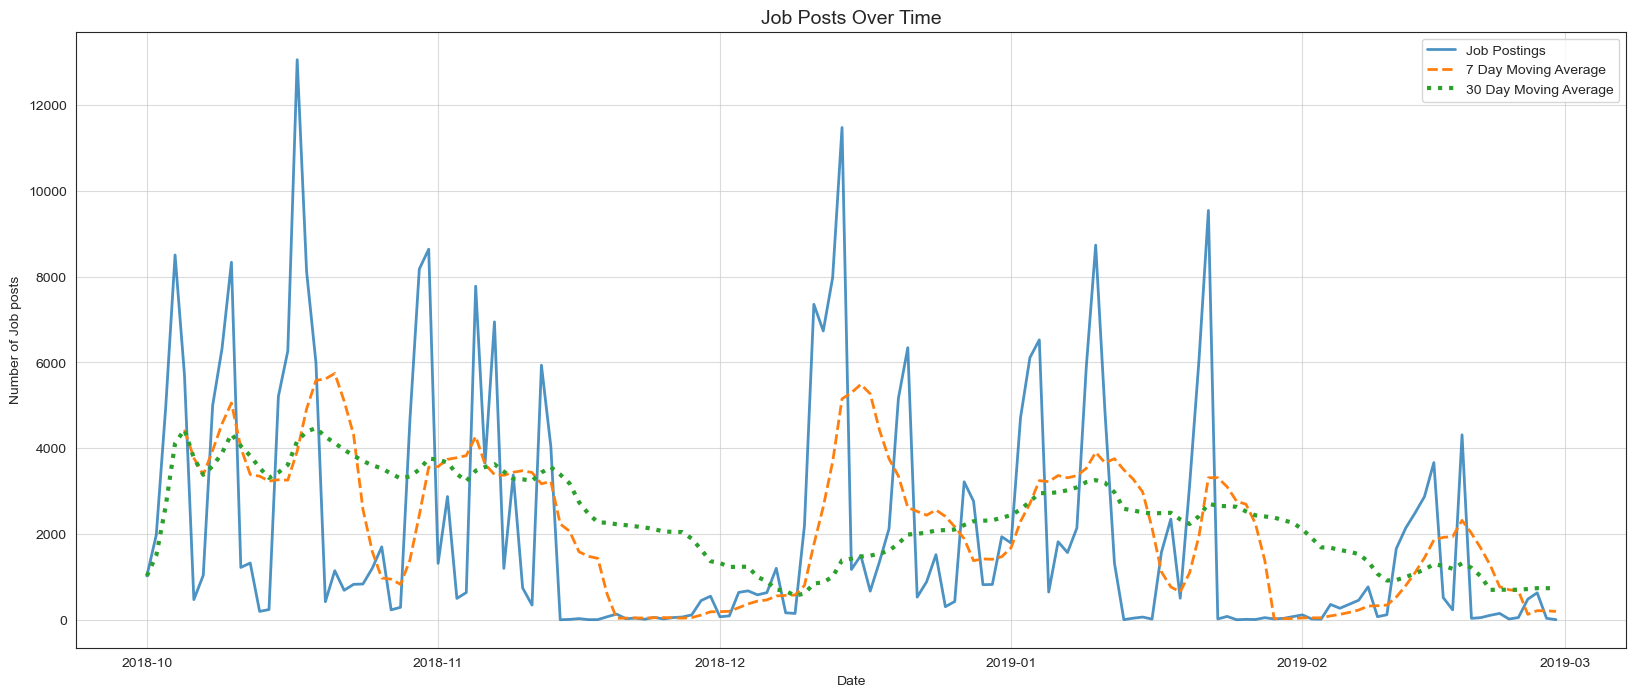

In [49]:
#get dataframe with dates as index
df_timeseries_total = df.groupby(['Date']).count().reset_index().sort_values(by=['Date'])
df_timeseries_total.set_index('Date',inplace=True)

#exclude March because the dataset stops halfway through the month
df_timeseries_total = df_timeseries_total[:151]

# Get the count of jobs over time
df_timeseries_total = df_timeseries_total['Title'].rename('Count')

# Generate moving average over a weekly interval
moving_average_week = df_timeseries_total.rolling(7, min_periods=5)
moving_average_month = df_timeseries_total.rolling(30, min_periods=0)
plot_df = pd.DataFrame({'Count': df_timeseries_total, '7 Day Moving Average': moving_average_week.mean(), '30 Day Moving Average': moving_average_month.mean()})

plt.figure(figsize=(20,8))
plt.plot(plot_df['Count'],alpha=0.8, lw=2)
plt.plot(plot_df['7 Day Moving Average'],linestyle='--', lw=2)
plt.plot(plot_df['30 Day Moving Average'],linestyle='dotted', lw=3)
plt.legend(['Job Postings', '7 Day Moving Average', '30 Day Moving Average'], frameon=True)
plt.grid(linestyle='-', alpha=0.7)
plt.title('Job Posts Over Time',size=14)
plt.xlabel('Date')
plt.ylabel('Number of Job posts')
plt.show()

##### Discussion:
The chart given the irregular fluctuations in job postings and the lack of a clear pattern observed in the dataset, it's likely that neither the 7-day nor the 30-day moving average would provide a highly accurate prediction of future job postings.

- 7-Day Moving Average:

This shorter-term moving average would likely respond more quickly to fluctuations in job postings, capturing more of the short-term variability. - It might be better suited for identifying rapid changes in posting activity, such as the spikes in mid-October and mid-December, as well as the low period in mid-November to early December.

- 30-Day Moving Average:

Offer a smoother trendline, filtering out some of the short-term noise in the data.

Not capture rapid changes as effectively as the 7-day moving average, it could provide a clearer indication of the underlying trend over a longer time frame.

##### Conclusion:

Considering the dataset's limitations in predicting future trends and the presence of irregular fluctuations, neither moving average method may offer a highly accurate prediction. However, if forced to choose, the 7-day moving average might be slightly more sensitive to short-term changes in job postings, potentially capturing the rapid fluctuations observed in the data.

#### Keywords for ICT

In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from nltk.corpus import stopwords
import wordcloud

classifications = df['Classification'].dropna().unique()

custom_stopwords = ['store','join', 'looking', 'want', 'site', 'month', 'week', 'level', 'required', 'one', 'end', 'nsw',
                    'positions', 'make', 'across', 'take', 'key', 'large', 'based', 'melbourne', 'staff', 'australia',
                    'position', 'currently', 'full', 'projects', 'north', 'basis', 'next', '12', 'per', 'term', 'program',
                    'home', 'long' 'person', 'agency', 'apply', 'day', 'roles', 'within' 'perth', 'sydney',  'residential',
                    'years', '2019', 'market', 'data', 'exists', 'immediate', 'available', 'officer', 'needed', 'school',
                    'south', 'small', 'cbd', 'year', 'months', 'early', 'life', 'largest', '30', 'part', 'well', 'busy', 'cafe', 'restaurant']

stop_words = stopwords.words('english')
for word in custom_stopwords:
    stop_words.append(word)

In [51]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

def update(Classification="Information & Communication Technology"):
    requirements = df[df['Classification']==Classification]['Requirement'].dropna()
    original_documents = [x.strip() for x in requirements] 

    tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1,1), min_df = 1, stop_words = stop_words, max_features=200)

    features = tfidf.fit(original_documents)
    corpus_tf_idf = tfidf.transform(original_documents) 

    sum_words = corpus_tf_idf.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in tfidf.vocabulary_.items()]
    words_freq_dict = {x: y for x,y in words_freq}
    words_freq_dict.items()
    #print(sorted(words_freq, key = lambda x: x[1], reverse=True)[:5])

    word_cloud = wordcloud.WordCloud(width=1280,height=720,background_color='white',colormap='viridis')
    word_cloud.generate_from_frequencies(words_freq_dict)

    plt.figure(figsize=(16,16))
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.axis("off")
    plt.title('TF-IDF Analysis of Requirements', size=30)
    plt.show()
    
interact(update, Classification=classifications)

interactive(children=(Dropdown(description='Classification', index=13, options=('Retail & Consumer Products', …

<function __main__.update(Classification='Information & Communication Technology')>

# Part 4 - Discussion. [4 points]

## Scenario 1
Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his school. He is finding a major in the University which can guarantee a job in his state (Queensland) with a good income (>=80K) in the future. Based on the current job market dataset, which major and the related subjects do you recommend him? Explain your choice.*** ( Max 750 words)

In [52]:
# QLD location inspect

df_top_15 = df['Location'].value_counts().reset_index()[:20]
df_top_15.columns = ['Location', 'Total of Job Postings']
df_top_15

,Location,Total of Job Postings
0,Sydney,60729
1,Melbourne,46656
2,Brisbane,21455
3,Perth,13192
4,Adelaide,6650
5,ACT,6249
6,"Newcastle, Maitland & Hunter",3953
7,Gold Coast,3587
8,South West Coast VIC,1789
9,Mackay & Coalfields,1701


In [53]:
qld = ['Brisbane', 'Gold Coast', 'Mackay & Coalfields', 'Sunshine Coast', 'Cairns & Far North', 'Northern QLD']
df_qld = df[df['Location'].isin(qld)]
df_qld['Location'].value_counts()

Location
Brisbane               21455
Gold Coast              3587
Mackay & Coalfields     1701
Sunshine Coast          1554
Cairns & Far North      1507
Northern QLD            1492
Name: count, dtype: int64

In [54]:
df_qld['Classification'].value_counts()

Classification
Trades & Services                         3387
Healthcare & Medical                      3126
Information & Communication Technology    2947
Hospitality & Tourism                     2618
Manufacturing, Transport & Logistics      2187
Education & Training                      1668
Administration & Office Support           1625
Retail & Consumer Products                1311
Accounting                                1289
Mining, Resources & Energy                1220
Sales                                     1216
Government & Defence                      1207
Construction                              1168
Engineering                               1134
Community Services & Development           731
Legal                                      716
Call Centre & Customer Service             579
Human Resources & Recruitment              564
Real Estate & Property                     541
Banking & Financial Services               478
Marketing & Communications                 44

In [55]:
qld_classification = df_qld.groupby('Classification').agg({'AverageSalary': 'mean', 'Classification': 'size'})
qld_classification.columns = ['Average Salary', 'Count']
qld_classification = qld_classification.sort_values(by='Count', ascending=False)
qld_classification

,Average Salary,Count
Classification,,
Trades & Services,51.481399,3387
Healthcare & Medical,127.876040,3126
Information & Communication Technology,185.468782,2947
Hospitality & Tourism,41.878915,2618
"Manufacturing, Transport & Logistics",54.596936,2187
Education & Training,70.284472,1668
Administration & Office Support,45.132000,1625
Retail & Consumer Products,43.122807,1311
Accounting,79.375485,1289


In [56]:
qld_80K = qld_classification[qld_classification['Average Salary']>=80].reset_index()
qld_80K

,Classification,Average Salary,Count
0,Healthcare & Medical,127.876040,3126
1,Information & Communication Technology,185.468782,2947
2,"Mining, Resources & Energy",143.599180,1220
3,Government & Defence,106.524855,1207
4,Construction,109.971318,1168
5,Engineering,113.168430,1134
6,Legal,107.993017,716
7,Insurance & Superannuation,92.182857,175
8,Consulting & Strategy,133.669065,139
9,CEO & General Management,271.227941,136


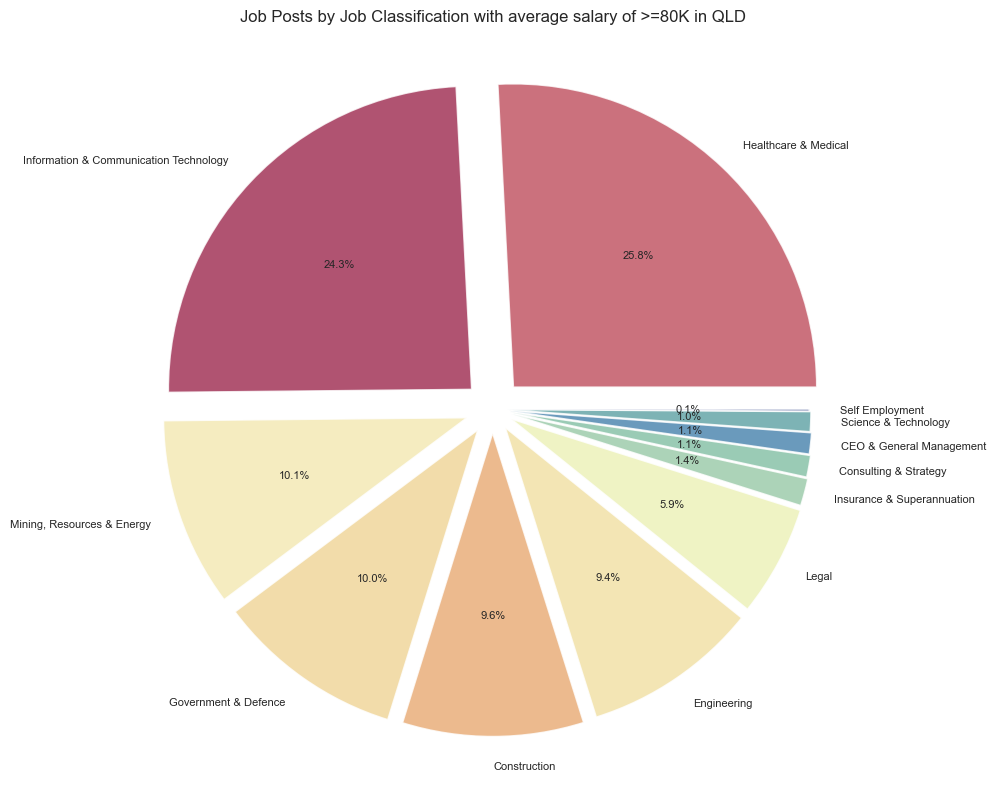

In [57]:
%matplotlib inline

# Pie char for job market share of cities
from matplotlib import cm

explode = [0.1-x*0.005 for x in range(len(qld_80K))]
clrs = qld_80K.sort_values(by="Count", ascending=False).reset_index()['Classification'].apply(lambda x: color_by_classification.get(x))

# Set the style
sns.set_style("white")

# Create a pie chart
plt.figure(figsize=(10,10))
plt.pie(qld_80K['Count'], labels=qld_80K['Classification'], autopct='%1.1f%%', 
        startangle=0, colors =clrs, explode=explode, wedgeprops={'alpha':0.8},
       textprops=dict(fontsize=8))


plt.tight_layout()
plt.title('Job Posts by Job Classification with average salary of >=80K in QLD')
plt.show()

In [58]:
qld_med_subs = df_qld[df_qld['Classification'] == 'Healthcare & Medical']['SubClassification'].value_counts()
print('Top 5 in Healthcare & Medical\n', qld_med_subs.head(5),'\n')
print('Last 5 in Healthcare & Medical\n', qld_med_subs.tail(5))

Top 5 in Healthcare & Medical
 SubClassification
Nursing - Aged Care                     411
General Practitioners                   323
Physiotherapy, OT & Rehabilitation      319
Dental                                  223
Nursing - General Medical & Surgical    214
Name: count, dtype: int64 

Last 5 in Healthcare & Medical
 SubClassification
Nursing - Paediatric & PICU    15
Nursing - High Acuity           9
Chiropractic & Osteopathic      7
Dieticians                      6
Ambulance/Paramedics            4
Name: count, dtype: int64


In [59]:
qld_ict_subs = df_qld[df_qld['Classification'] == 'Information & Communication Technology']['SubClassification'].value_counts()
print('Top 5 in ICT\n', qld_ict_subs.head(5),'\n')
print('Last 5 in ICT\n', qld_ict_subs.tail(5))

Top 5 in ICT
 SubClassification
Developers/Programmers            515
Programme & Project Management    396
Business/Systems Analysts         395
Help Desk & IT Support            217
Architects                        214
Name: count, dtype: int64 

Last 5 in ICT
 SubClassification
Sales - Pre & Post                  39
Product Management & Development    27
Team Leaders                        22
Technical Writing                   16
Engineering - Hardware               5
Name: count, dtype: int64


#### Discussion
Based on the original data, it can be seen that among the top 15 locations in terms of job postings, there are 6 places in Queensland that offers many opportunities:

- Brisbane
- Gold Coast
- Mackay & Coalfields
- Sunshine Coast
- Cairns & Far North
- North QLD

In order to understand the current job market data for Queensland, we will focus specifically on this 6 locations, which represent key economic hubs in Queensland with diverse industries and significant job opportunities.

After analyzing all job classifications in Queensland, we can conclude several valuable insights. 2 sectors - "Healthcare & Medical" and "Information & Communication Technology" emerge as the 2 top sectors, with approximately 24.6% and 23.4% of job postings with an average salary of $80K or higher in Queensland respectively belong to these sectors alone. This highlights the demand for skilled professionals in Healthcare & Medical and ICT sectors in Queensland. 

In addition, we need to consider key areas of opportunity related to these 2 sectors. In the Healthcare & Medical major, Nursing, General Practitioner and Dental roles reflect a significant opportunities for healthcare professionals and medical services in Queensland. Some other specialized roles like Dieticians, Paramedics have fewer job postings, suggesting niche areas with limited opportunities.

For Queensland's ICT sector, it represents abundant opportunities for job seekers with skills in software development, project management, and business analysis. On the other hand, some specific areas such as technical writing and hardware engineering do not give many offers, showing a low demand in this industry.

#### Conclusion:
Based on the above analysis, it is recommended for Tom to enroll in either Healthcare & Medical major or Information & Communication Technology major to align with Queensland's workforce needs along with a good income. 

For the Healthcare & Medical sector, it is best to focus specifically on studying Nursing, Health Science and Dental related subjects, which can cater the significant demand for healthcare professionals. 

In the ICT, subjects like Software Development and Project Management or some other engineering related subjects about mining operations and environmental engineering are advised to tap into opportunities in Software Development, Business Analysis or Mining, Resources & Energy field.

## Scenario 2
To gain a better reputation, Griffith University wants to attract more students by enhancing the employability of the graduates. As a data analyst, you need to give the recommendation for the management board for the changing of the admission numbers in each major. Which majors should be extended, and which majors should be reduced (Assume that we only need to use job market data, regardless of other factors such as social impact, economic impact, etc. )? Justify your recommendation.*** ( Max 750 words)


### Australia's Job Market

In [60]:
classification = df.groupby('Classification').agg({'AverageSalary': 'mean', 'Classification': 'size'})
classification.columns = ['Average Salary', 'Count']
classification = classification.sort_values(by='Count', ascending=False)
classification

,Average Salary,Count
Classification,,
Information & Communication Technology,182.580155,22787
Trades & Services,53.402037,17966
Healthcare & Medical,117.438628,17068
Hospitality & Tourism,40.248888,15513
"Manufacturing, Transport & Logistics",58.744827,12372
Administration & Office Support,48.612858,10017
Accounting,87.655312,9365
Education & Training,72.726758,9272
Construction,126.532919,8369


In [61]:
# Analysis
print('Top 5\n', classification.head(5),'\n')
print('Last 5\n', classification.tail(5))

Top 5
                                         Average Salary  Count
Classification                                               
Information & Communication Technology      182.580155  22787
Trades & Services                            53.402037  17966
Healthcare & Medical                        117.438628  17068
Hospitality & Tourism                        40.248888  15513
Manufacturing, Transport & Logistics         58.744827  12372 

Last 5
                                  Average Salary  Count
Classification                                        
Science & Technology                 101.107182    905
Farming, Animals & Conservation       57.797052    882
CEO & General Management             255.720047    843
Advertising, Arts & Media             70.353541    833
Self Employment                       91.387097     93


#### Discussion:

Based on the analysis shows the top 5 job demands and the last 5 job demands by Job Postings along with the Average salary. The top 5 Majors Information & Communication Technology, Trades & Services, Healthcare & Medical, Hospitality & Tourism, and Manufacturing, Transport & Logistics exhibited robust job demand, boasting thousands of job postings.
However, majors such as CEO & General Management, Science & Technology, Advertising, Arts & Media, Farming, Animals & Conservation, and Self Employment displayed lower job demand, with fewer opportunities available.

#### Conclusion:

We recommend extending admission for majors with high job demand, such as Information & Communication Technology, Trades & Services, Healthcare & Medical, Hospitality & Tourism, and Manufacturing, Transport & Logistics. These majors offer higher job opportunities and promising career prospects for graduates. On the other hand, we suggest reducing admission for majors with lower job demand, including CEO & General Management, Science & Technology, Advertising, Arts & Media, Farming, Animals & Conservation, and Self Employment. While these majors may still hold value for certain students who are interested in them, by adjusting admission numbers may ensures that resources are utilized efficiently and that graduates are ready for the job market.

### Queensland's Job Market

In [62]:
# Analysis
print('Top 5\n', qld_classification.head(5),'\n')
print('Last 5\n', qld_classification.tail(5))

Top 5
                                         Average Salary  Count
Classification                                               
Trades & Services                            51.481399   3387
Healthcare & Medical                        127.876040   3126
Information & Communication Technology      185.468782   2947
Hospitality & Tourism                        41.878915   2618
Manufacturing, Transport & Logistics         54.596936   2187 

Last 5
                                  Average Salary  Count
Classification                                        
CEO & General Management             271.227941    136
Science & Technology                  88.259843    127
Farming, Animals & Conservation       49.741379    116
Advertising, Arts & Media             52.205882    102
Self Employment                       88.846154     13


In [63]:
# Analysis in Queensland
print('Top 5\n', qld_classification.head(5),'\n')
print('Last 5\n', qld_classification.tail(5))

Top 5
                                         Average Salary  Count
Classification                                               
Trades & Services                            51.481399   3387
Healthcare & Medical                        127.876040   3126
Information & Communication Technology      185.468782   2947
Hospitality & Tourism                        41.878915   2618
Manufacturing, Transport & Logistics         54.596936   2187 

Last 5
                                  Average Salary  Count
Classification                                        
CEO & General Management             271.227941    136
Science & Technology                  88.259843    127
Farming, Animals & Conservation       49.741379    116
Advertising, Arts & Media             52.205882    102
Self Employment                       88.846154     13


#### Discussion:
    
The other analysis is based on the job demand in Queensland. The top five majors in job demand are Trades & Services, Healthcare & Medical, Information & Communication Technology, Hospitality & Tourism, Manufacturing, and Transport & Logistics. These majors attract a significant number of job listings with more than 2000 opportunities each, indicating strong demand in the Queensland job market.

Conversely, the last five in terms of job demand are CEO & General Management, Science & Technology, Farming, Animals & Conservation, Advertising, Arts & Media, and Self Employment. These majors have relatively lower job demands, with fewer opportunities available in the Queensland job market, especially with self-employment as the lowest one with just only 13 job postings.

#### Conclusion:

The top 5 Classifications exhibit strong job demand in Queensland and offer promising career prospects for graduates. We suggest that extending admission numbers for these majors can ensure that Griffith University meets the workforce needs of the region it is located. While for the last 5 majors may still have value for certain students, their lower job demand suggests that admission numbers could be adjusted to better align with market realities. This allows the university to allocate resources effectively and prioritize majors with higher demand.